# Happiness Data
#### Abby Zweifach, Morgan Sizemore and Aly Berger

In [45]:
import pandas as pd
import numpy as np
import plotly_express as pe
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
go.Choropleth
import geopandas as gpd

import hypertools as hyp 

from scipy.stats import pearsonr




%matplotlib inline 
#Importing needed libraries

### Importing first dataset

In [46]:
df = pd.read_excel('whr_modified.xlsx').fillna(0)
df.head()

#df = dataframe of country data spanning several years

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Country happiness score
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.794
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,0.0,0.441906,0.286315,0.0,0.0,0.0,0.0,0.0,0.0,3.794
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,0.0,0.327318,0.275833,0.0,0.0,0.0,0.0,0.0,0.0,3.794
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,0.0,0.336764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.794
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,0.0,0.344540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.794


In [47]:
df.columns

Index(['WP5 Country', 'country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be t

In [48]:
df.shape

(1420, 28)

### Cleaning first dataset

In [49]:
df_clean = df.set_index(['country'])
df_clean.drop(['WP5 Country'], inplace=True, axis=1)
numeric_data = df_clean[['year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']] = df_clean[['year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']].apply(pd.to_numeric, errors='coerce')
by_country=df_clean.groupby('country').aggregate(np.mean)
by_country.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Country happiness score
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2012.000000,3.933825,7.447978,0.520064,48.727537,0.557993,0.144021,0.812616,0.590265,0.293500,...,0.000000,0.307310,0.062461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.794
Albania,2011.888889,5.027596,9.172559,0.732704,67.999568,0.612438,-0.106925,0.857864,0.639671,0.299853,...,0.305000,0.447388,0.042082,0.000000,0.000000,0.243243,0.232000,0.000000,0.000000,4.644
Algeria,2012.600000,5.625685,9.498361,0.643194,64.117065,0.341784,-0.127289,0.389227,0.489794,0.206570,...,0.000000,0.485366,0.000000,0.000000,0.000000,0.000000,0.107644,0.000000,0.179286,5.872
Angola,2012.500000,4.420299,8.816016,0.737973,44.572942,0.455957,-0.084260,0.867018,0.613339,0.351173,...,0.473400,0.257191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.795
Argentina,2011.000000,6.439476,5.268272,0.906024,66.701826,0.745954,-0.071724,0.844310,0.843868,0.271503,...,0.479421,0.250090,0.036204,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531,6.599


In [50]:
by_country.shape

(164, 26)

### Importing Second Dataset

In [51]:
df2 = pd.read_excel('whr2.xlsx').set_index(['Country'])
df2.head(10)

#Top 5 happiest countries: Norway, Denmark, Iceland, Switzerland, Finland
#Least happy: Rwanda, Syria, Tanzania, Burundi, Central African Republic 

,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
Country,,,,,,,,,,
Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
Netherlands,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
Canada,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
New Zealand,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
Sweden,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538


### Cleaning second dataset

In [52]:
df2_clean = df2.sort_values('Country',ascending=True)
df2_clean.head(10)

,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
Country,,,,,,,,,,
Afghanistan,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
Albania,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
Algeria,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
Angola,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
Argentina,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
Armenia,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
Australia,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
Austria,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506
Azerbaijan,5.234,5.299287,5.168714,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482


In [53]:
df2_clean.shape

(155, 10)

### Data Visualization

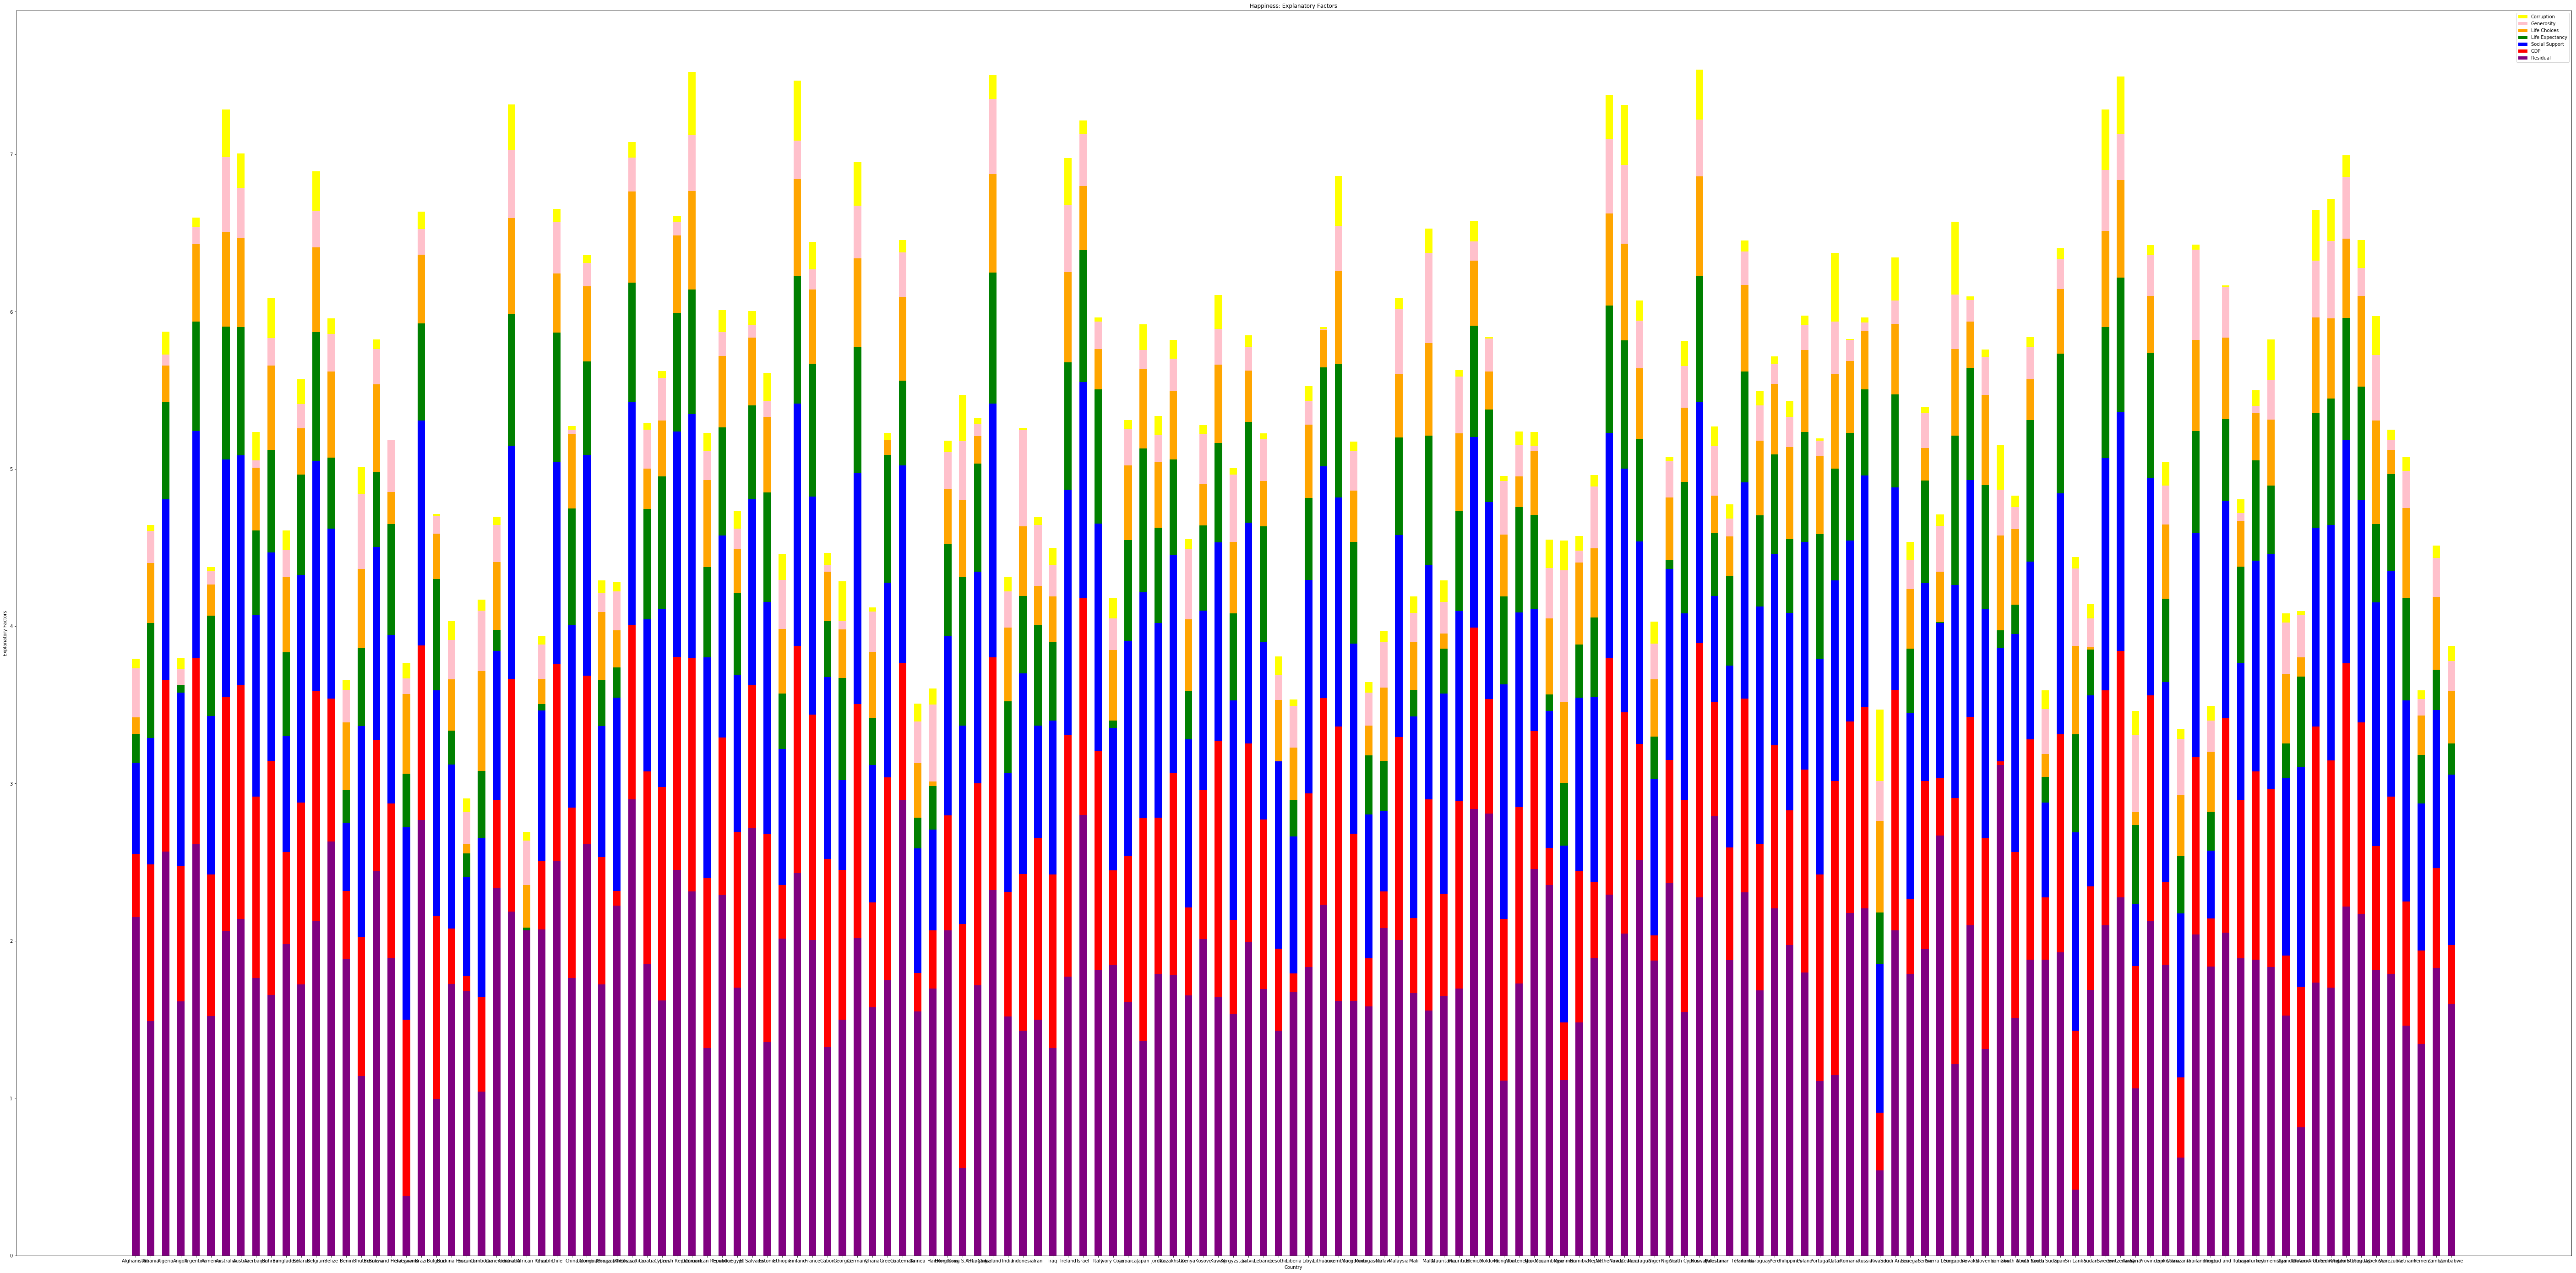

In [54]:
country = df2_clean.index
GDP = df2_clean['Explained by: GDP per capita']
social_support = df2_clean['Explained by: Social support']
life_exp = df2_clean['Explained by: Healthy life expectancy']
life_choices = df2_clean['Explained by: Freedom to make life choices']                  
generosity = df2_clean['Explained by: Generosity']    
corruption = df2_clean['Explained by: Perceptions of corruption']
residual = df2_clean['Dystopia (1.85) + residual']
ind = [x for x, _ in enumerate(country)]
stackedbarplot = plt.figure(figsize=(100,50))


plt.bar(ind, corruption, width=0.5, label='Corruption', color='Yellow', bottom=generosity+life_choices+life_exp+social_support+GDP+residual )
plt.bar(ind, generosity, width=0.5, label='Generosity', color='Pink', bottom=life_choices+life_exp+social_support+GDP+residual)
plt.bar(ind, life_choices, width=0.5, label='Life Choices', color='Orange', bottom=life_exp+social_support+GDP+residual)
plt.bar(ind, life_exp, width=0.5, label='Life Expectancy', color='Green', bottom=social_support+GDP+residual)
plt.bar(ind, social_support, width=0.5, label='Social Support', color='Blue', bottom=GDP+residual)
plt.bar(ind, GDP, width=0.5, label='GDP', color='Red', bottom=residual)
plt.bar(ind, residual, width=0.5, label='Residual', color='Purple')


plt.xticks(ind, country)
plt.ylabel("Explanatory Factors")
plt.xlabel("Country")
plt.legend(loc="upper right")
plt.title("Happiness: Explanatory Factors")
plt.show()

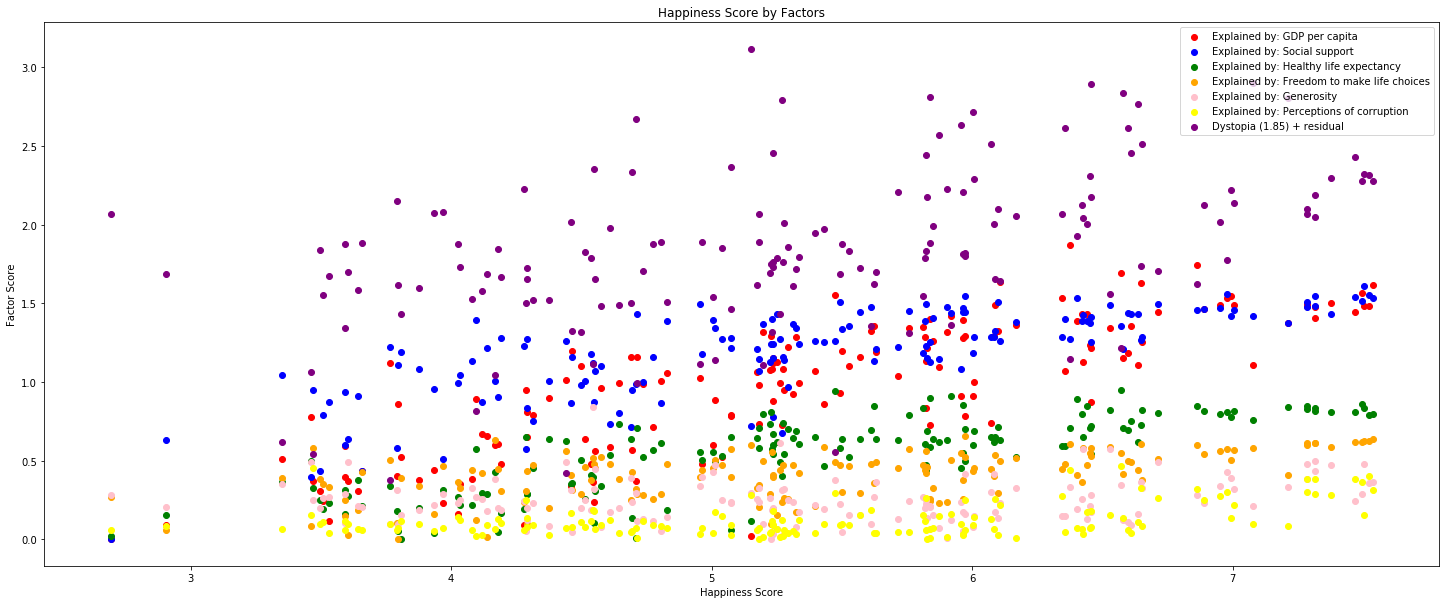

In [55]:
x = df2_clean['Happiness score']
GDP = df2_clean['Explained by: GDP per capita']
social_support = df2_clean['Explained by: Social support']
life_exp = df2_clean['Explained by: Healthy life expectancy']
life_choices = df2_clean['Explained by: Freedom to make life choices']                  
generosity = df2_clean['Explained by: Generosity']    
corruption = df2_clean['Explained by: Perceptions of corruption']
residual = df2_clean['Dystopia (1.85) + residual']
plt.figure(figsize=(25,10))
plt.scatter(x, GDP, color='red')
plt.scatter(x, social_support, color='blue')
plt.scatter(x, life_exp ,color='green')
plt.scatter(x, life_choices, color='orange')
plt.scatter(x, generosity, color='pink')
plt.scatter(x, corruption, color='yellow')
plt.scatter(x, residual, color='purple')


plt.xlabel('Happiness Score')
plt.ylabel('Factor Score')
plt.title('Happiness Score by Factors')
plt.legend(loc="upper right")
plt.show()

In [56]:
numeric_dat = df2[['Happiness score']] = df2[['Happiness score']].apply(pd.to_numeric, errors='coerce')
numeric_dat.head()

,Happiness score
Country,
Norway,7.537
Denmark,7.522
Iceland,7.504
Switzerland,7.494
Finland,7.469


In [57]:

data = dict(
    type ='choropleth',
    locations = numeric_dat.index,
    locationmode='country names',
    colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']],
    z=numeric_dat['Happiness score'])


map = go.Figure(data =[data])
py.offline.iplot(map)


#source https://towardsdatascience.com/an-introduction-to-geographical-data-visualization-3486959cd4b8

In [58]:
factors2= numeric_data.fillna(0)
factors2.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,0.0,0.0,0.441906,0.286315,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,0.0,0.0,0.327318,0.275833,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,...,0.0,0.0,0.336764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,...,0.0,0.0,0.344540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring residual factors: Trust

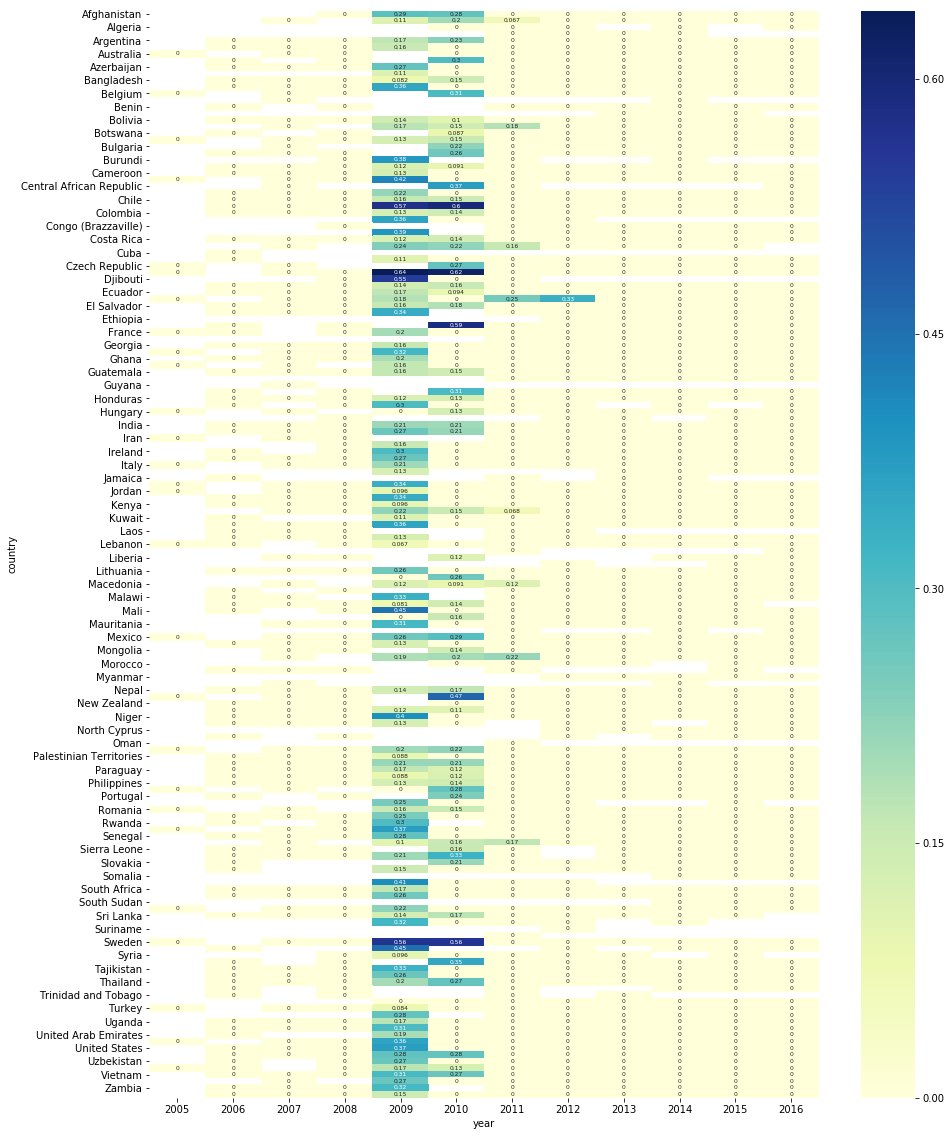

In [59]:

heatmap1_data = pd.pivot_table(factors2, values='Most people can be trusted, Gallup', 
                     index=factors2.index, 
                     columns='year')
plt.figure(figsize=(15,20))
sns.heatmap(heatmap1_data, cmap="YlGnBu",annot=True, annot_kws={"size": 6})

In [60]:
trust = pd.read_excel('whr_modified.xlsx') 
trust.head()

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Country happiness score
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.794
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,3.794
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,3.794
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.794
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.794


In [61]:
trust = trust[np.isfinite(trust['Most people can be trusted, Gallup'])]
trust.head()

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Country happiness score
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,3.794
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,3.794
10,Albania,Albania,2009,5.485470,9.104285,0.833047,67.494919,0.525223,-0.157199,0.863665,...,0.305,0.617361,0.111004,NaN,NaN,0.243243,0.232,NaN,NaN,4.644
11,Albania,Albania,2010,5.268937,9.145679,0.733152,67.667595,0.568958,-0.171882,0.726262,...,0.305,0.543528,0.201118,NaN,NaN,0.243243,0.232,NaN,NaN,4.644
12,Albania,Albania,2011,5.867422,9.173692,0.759434,67.846458,0.487496,-0.204585,0.877003,...,0.305,0.407266,0.066618,NaN,NaN,0.243243,0.232,NaN,NaN,4.644


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



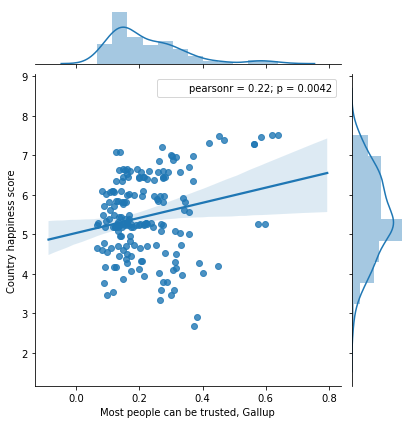

In [62]:
sns.jointplot(trust['Most people can be trusted, Gallup'], trust['Country happiness score']
, kind='reg', stat_func=pearsonr)

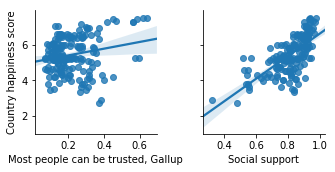

In [63]:
sns.pairplot(trust, x_vars=["Most people can be trusted, Gallup", "Social support"], y_vars=["Country happiness score"], kind="reg");

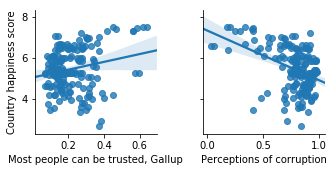

In [64]:
sns.pairplot(trust, x_vars=["Most people can be trusted, Gallup", "Perceptions of corruption"], y_vars=["Country happiness score"], kind="reg");

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



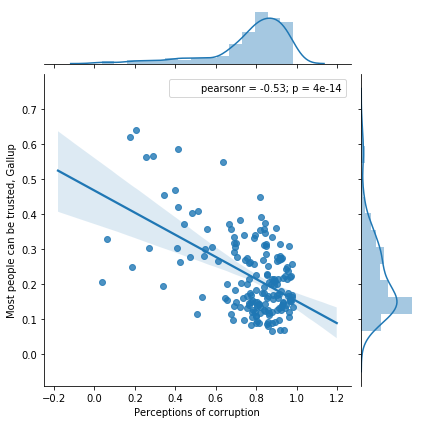

In [65]:
sns.jointplot(trust['Perceptions of corruption'], trust['Most people can be trusted, Gallup']
, kind='reg', stat_func=pearsonr)

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



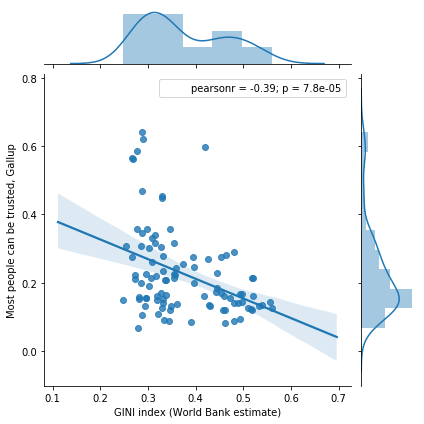

In [66]:
sns.jointplot(trust['GINI index (World Bank estimate)'], trust['Most people can be trusted, Gallup']
, kind='reg', stat_func=pearsonr)